In [1]:
import face_recognition
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

問題 : 怎麼知道import的 face_recognition 封裝在哪裡?

Ans : 安裝路徑下的 "...\Anaconda3\envs\facerecog-demo\Lib\site-packages\face_recognition"

問題 : matplotlib 作用?

Ans : 繪圖套件
      
      試試 ?matplotlib

In [11]:
# ?matplotlib

In [2]:
# 指定圖片路徑
image = face_recognition.load_image_file("./test-images/002.JPG")
# 使用 CNN模型 取得臉部定位
face_locations_cnn = face_recognition.face_locations(image, model="cnn")
# 使用 HOG模型 取得臉部定位
face_locations = face_recognition.face_locations(image)
# 印出結果(座標)
print(face_locations_cnn, face_locations)

[(73, 264, 277, 60)] [(93, 291, 316, 68)]


[数据绘图（Matplotlib）](https://bookdata.readthedocs.io/en/latest/beginning/04_matplotlib.html)

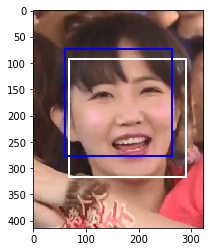

In [3]:
# 繪出 HOG模型 臉部定位
fig ,ax = plt.subplots(1)
ax.imshow(image)
(top, right, bottom, left) = face_locations[0]
rect = patches.Rectangle((left, top), ((right-left)), ((bottom-top)), linewidth=2,edgecolor='w',facecolor='none')
ax.add_patch(rect)

# # 繪出 CNN模型 臉部定位
(top, right, bottom, left) = face_locations_cnn[0]
rect = patches.Rectangle((left, top), ((right-left)), ((bottom-top)), linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
plt.show()


[Python Tutorial 第二堂（1）數值與字串型態](http://www.codedata.com.tw/python/python-tutorial-the-2nd-class-1-numeric-types-and-string/)

[Python Tutorial 第二堂（2）容器、流程、for 包含式](http://www.codedata.com.tw/python/python-tutorial-the-2nd-class-2-container-flow-for-comprehension/)


In [9]:
# 臉部特徵點估計
face_landmarks_list = face_recognition.face_landmarks(image)
# 印出結果 face_landmarks_list[0]是取出第一筆資料，格式為dict，取出法為items()
face_landmarks_list[0].items()
# face_landmarks_list

dict_items([('chin', [(66, 181), (73, 207), (82, 232), (92, 255), (105, 277), (123, 296), (146, 311), (172, 320), (198, 321), (221, 313), (239, 296), (252, 275), (261, 252), (267, 229), (270, 206), (270, 183), (267, 159)]), ('left_eyebrow', [(95, 150), (108, 138), (126, 133), (145, 134), (162, 138)]), ('right_eyebrow', [(189, 135), (203, 129), (219, 126), (236, 127), (249, 136)]), ('nose_bridge', [(178, 156), (181, 172), (184, 188), (187, 205)]), ('nose_tip', [(167, 220), (178, 221), (189, 221), (197, 218), (205, 215)]), ('left_eye', [(118, 165), (129, 159), (140, 158), (150, 164), (140, 165), (129, 165)]), ('right_eye', [(204, 159), (213, 151), (224, 150), (234, 154), (225, 156), (214, 158)]), ('top_lip', [(148, 255), (162, 242), (179, 235), (190, 236), (200, 233), (213, 237), (223, 245), (219, 246), (200, 241), (190, 242), (179, 243), (152, 254)]), ('bottom_lip', [(223, 245), (215, 266), (203, 277), (192, 280), (180, 280), (163, 272), (148, 255), (152, 254), (179, 266), (191, 266), (

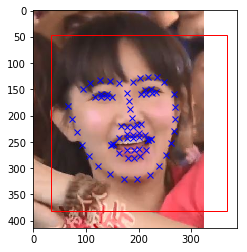

In [5]:
fig ,ax = plt.subplots(1)
ax.imshow(image)
(top, right, bottom, left) = face_locations[0]
rect = patches.Rectangle((left-left*0.5, top-top*0.5), ((right-left)*1.5), ((bottom-top)*1.5), linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
for key, values in face_landmarks_list[0].items():
    for x, y in values:
        plt.plot(x, y, 'bx')
plt.show()

In [9]:
known_image = face_recognition.load_image_file("./test-images/002.JPG")
unknown_image = face_recognition.load_image_file("./test-images/004.JPG")

know_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([know_encoding], unknown_encoding)

In [10]:
results

[False]